In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline
from numpy import genfromtxt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('ke2.csv')
my_data = genfromtxt('apple-all-products-quarterly-sales.csv', delimiter=',')

In [3]:
lm = smf.ols(formula='isales ~ st + st2', data=data).fit()
# print the coefficients
lm.params

Intercept    4.441825
st           0.106315
st2         -0.000052
dtype: float64

In [4]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 isales   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     98.33
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.26e-16
Time:                        23:57:23   Log-Likelihood:                -161.26
No. Observations:                  44   AIC:                             328.5
Df Residuals:                      41   BIC:                             333.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4418      2.521      1.762      0.086      -0.650       9.534
st             0.1063      0.012      8.769      0.000       0.082       0.131
st2        -5.245e-05   9.73e-06     -5.389      0.000   -7.21e-05   -3.28e-05
==============================================================================
Omnibus:                        6.400   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.340
Skew:                           0.823   Prob(JB):                       0.0693
Kurtosis:                       3.454   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#data = data[:35]

In [6]:
b = lm.params
b_1 = b[0]
b_2 = b[1]
b_3 = b[2]

In [7]:
m1 = (-b[1]+(b[1]**2-4*b[0]*b[2])**0.5)/(2*b[2])
m2 = (-b[1]-(b[1]**2-4*b[0]*b[2])**0.5)/(2*b[2])

m1

In [8]:
print(m1)

-40.95230204070664


In [9]:
print(m2)

2067.9431093283447


In [10]:
p = b_1/max(m1,m2)
q = -max(m1,m2)*b_3

In [11]:
p

0.0021479435496910685

In [12]:
q

0.10846337913787442

In [13]:
def bass(M,p,q,iterations,step):
    t_array = [0]
    n_array = [0]
    Big_n_array = [p*M]
    ad_array = [p*M]
    for i in range(1,round(iterations/step)):
        t_array.append(i)
        n_array.append((p+q*Big_n_array[-1]/M)*(M-Big_n_array[-1]))
        Big_n_array.append(Big_n_array[-1]+n_array[-1])
        ad_array.append(p*(M-Big_n_array[-1]))
    return t_array, n_array, ad_array, Big_n_array
M = 100000
ex = bass(M,p,q,100,1)

In [14]:
def create_grafic_2_max(x_data,y_data):
    for x,y in zip(x_data,y_data):
        plt.plot(x,y)
        plt.xlabel('')
        plt.xlabel('')
        plt.title('') 
    plt.show() 

In [15]:
def create_grafic_2_max_one(x_data,y_data,data_real):
    plt.plot(x_data,y_data)
    plt.xlabel('')
    plt.xlabel('')
    plt.title('')
    plt.plot([i for i in range(len(data_real))],data_real)
    plt.show() 

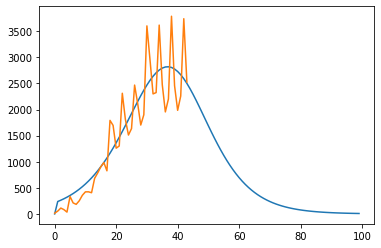

In [16]:
data_real = [i*10**5/2067 for i in data.to_numpy()[:,0]]
create_grafic_2_max_one(ex[0],ex[1],data_real)

In [17]:
def create_grafic_2_max_log(x_data,y_data):
    plt.plot(x_data,y_data)
    plt.xlabel('')
    plt.xlabel('')
    plt.title('')
    plt.show() 

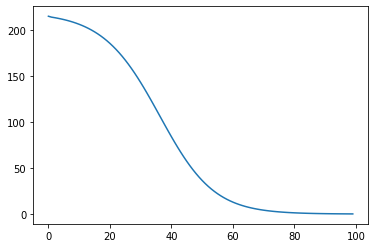

In [18]:
create_grafic_2_max_log(ex[0],ex[2])

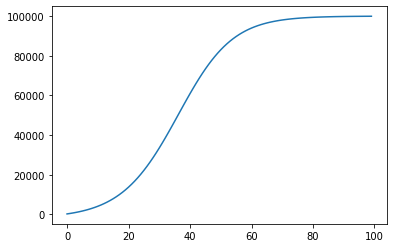

In [19]:
create_grafic_2_max_log(ex[0],ex[3])